In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [ ]:
dataset_path = "dataset"
train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "validation")
test_dir = os.path.join(dataset_path, "test")
print("Train:", train_dir)
print("Validation:", val_dir)
print("Test:", test_dir)

Train: dataset\train
Validation: dataset\validation
Test: dataset\test


In [14]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

num_classes = len(train_data.class_indices)
print("Classes:", num_classes)

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.
Classes: 36


In [15]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights="imagenet"
)

In [16]:
base_model.trainable = True
fine_tune_at = 100  # unfreeze last 50 layers

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,595,172 (9.90 MB)

 Trainable params: 2,198,628 (8.39 MB)

 Non-trainable params: 396,544 (1.51 MB)

In [17]:
EPOCHS = 20

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.2960 - loss: 2.7673 - val_accuracy: 0.6011 - val_loss: 1.3186
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.6231 - loss: 1.3709 - val_accuracy: 0.7550 - val_loss: 0.7391
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.7194 - loss: 0.9438 - val_accuracy: 0.8063 - val_loss: 0.5392
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.7772 - loss: 0.7412 - val_accuracy: 0.8490 - val_loss: 0.4075
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.8154 - loss: 0.6147 - val_accuracy: 0.8746 - val_loss: 0.3501
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.8315 - loss: 0.5473 - val_accuracy: 0.8860 - val_loss: 0.3047
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8671 - loss: 0.4472 - val_accuracy: 0.8917 - val_loss: 0.2843
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.8780 - loss: 0.3831 - val_accuracy: 0.9288 - v

In [1]:
model.save("fruit_model.h5")
print("Saved model as fruit_model.h5")

NameError: name 'model' is not defined

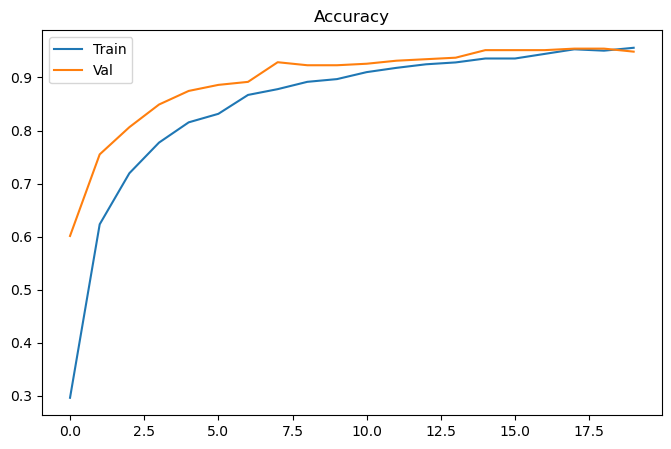

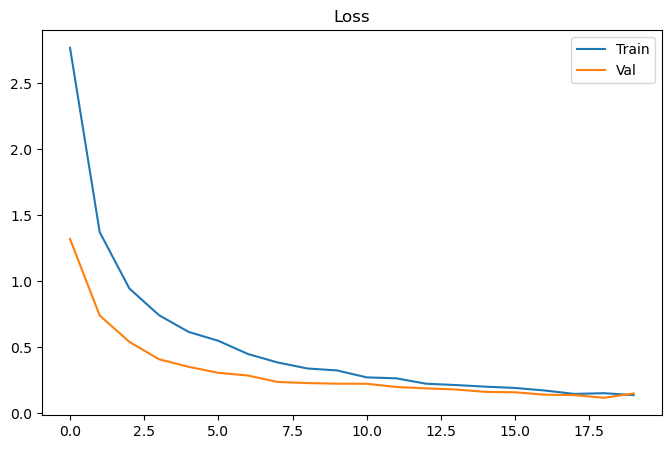

In [19]:
plt.figure(figsize=(8,5))
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Val")
plt.legend()
plt.title("Accuracy")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Val")
plt.legend()
plt.title("Loss")
plt.show()

In [20]:
test_loss, test_acc = model.evaluate(test_data)
print("TEST ACC:", test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9499 - loss: 0.1452
TEST ACC: 0.9498607516288757


In [2]:
model = tf.keras.models.load_model("fruit_model.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("fruit_model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\91630\AppData\Local\Temp\tmpt044_5pw\assets


INFO:tensorflow:Assets written to: C:\Users\91630\AppData\Local\Temp\tmpt044_5pw\assets


Saved artifact at 'C:\Users\91630\AppData\Local\Temp\tmpt044_5pw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 36), dtype=tf.float32, name=None)
Captures:
  2192711111824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2192711112400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2192711112208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2192711112784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2192711111440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2192711112976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2192711112016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2192711113744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2192711112592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2192711111632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  219

In [3]:

train_dir = "dataset/train"
class_names = sorted(os.listdir(train_dir))

with open("labels.txt", "w") as f:
    for name in class_names:
        f.write(name + "\n")

print("labels.txt created successfully!")


labels.txt created successfully!
